In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.cm as cm



In [4]:
df_output = pd.read_csv('~/quadrant_data.csv')

lookback = 10

df_output = df_output.iloc[0:lookback]

In [5]:


# Q1 ticker list (new)
ticker_list = ['JNK', 'LQD','CWB','ITA','HYG','PBS','PSP','PRF','IWS','RSP',
               'XLB','IWP','IAI','IWR','SPXL','ITOT','IHI','PRFZ','JKE','RPV','XLG']
   


ticker_dict = {
    'JNK' : 'Junk Bonds',
    'LQD' : 'Corporate Bonds',
    'CWB' : 'Convertible Securities',
    'ITA' : 'Aerospace & Defense',
    'HYG' : 'High Yield Bonds',
    'PBS' : 'Dynamic Media',
    'PSP' : 'Private Equity',
    'PRF' : 'FTSE 1000',
    'IWS' : 'MidCap Value',
    'RSP' : 'Eql Weight SP500',
    'XLB' : 'Materials',
    'IWP' : 'MidCap Growth',
    'IAI' : 'Broker Dealers',
    'IWR' : 'MidCap Index',
    'SPXL' : 'Levered 3x SP500',
    'ITOT' : 'SP1500',
    'IHI' : 'Medical Devices',
    'PRFZ' : 'Preferred Stock',
    'JKE' : 'LargeCap Growth',
    'RPV' : 'SP Pure Value',
    'XLG' : 'Top-50 SP500'
}





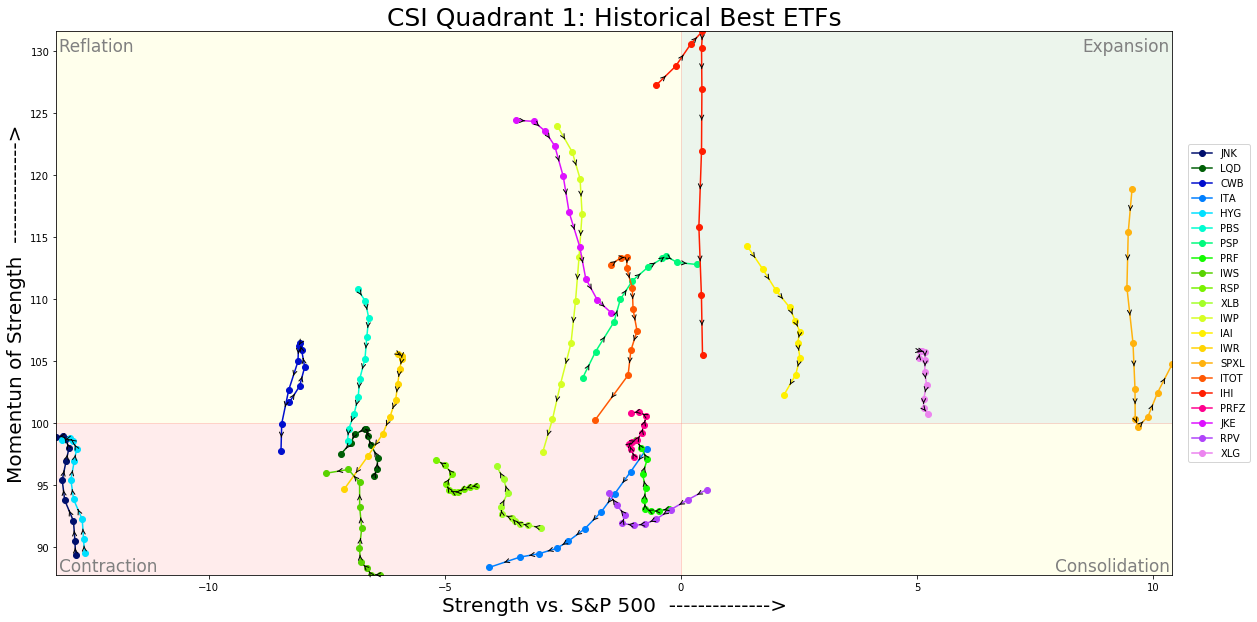

In [6]:
plt.figure(figsize = (20, 10))

# Create a list of lists for each available color in the color spectrum
colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0.01, .9,len(ticker_list))]  

max_x = np.nan
min_x = np.nan
max_y = np.nan
min_y = np.nan

color_count = 0

for ticker in ticker_list:
    
    # Plot each of the two variables as x and y
    var_x = df_output[ticker+'_value1']
    var_y = df_output[ticker+'_gmean']   
    
    # Plot the line and rotate through the colors list
    plt.plot(var_x, var_y, '-o', label = ticker, color = colorst[color_count])

    color_count += 1
    
    # Find the max/min of x and y for all the tickers
    max_x_temp = var_x.max()
    min_x_temp = var_x.min()
    
    max_y_temp = var_y.max()
    min_y_temp = var_y.min()   
    
    if str(max_x) == 'nan':
        max_x = max_x_temp
    if str(min_x) == 'nan':
        min_x = min_x_temp
        
    if str(max_y) == 'nan':
        max_y = max_y_temp
    if str(min_y) == 'nan':
        min_y = min_y_temp
    
    if max_x_temp > max_x:
        max_x = max_x_temp
    if min_x_temp < min_x:
        min_x = min_x_temp
        
    if max_y_temp > max_y:
        max_y = max_y_temp
    if min_y_temp < min_y:
        min_y = min_y_temp

    x = df_output[ticker+'_value1']
    y = df_output[ticker+'_gmean']
    # calculate position and direction vectors:
    x0 = x.iloc[range(len(x)-1)].values
    x1 = x.iloc[range(1,len(x))].values
    y0 = y.iloc[range(len(y)-1)].values
    y1 = y.iloc[range(1,len(y))].values
    xpos = (x0+x1)/2
    ypos = (y0+y1)/2
    xdir = x1-x0
    ydir = y1-y0
    # plot arrow on each line:
    for X,Y,dX,dY in zip(xpos, ypos, xdir, ydir):
        plt.annotate("", xytext=(X,Y),xy=(X+0.001*dX,Y+0.001*dY), 
        arrowprops=dict(arrowstyle="->", color='k'), size = 10)


plt.margins(0, 0)
# Add rectangle overlays to act as a background
## Tuple defines the lower left point of the rectangle fyi
plt.gca().add_patch(Rectangle((min_x,min_y),0 - min_x,100 - min_y, linewidth=1, edgecolor='r', facecolor='red', alpha = .075))
plt.gca().add_patch(Rectangle((min_x,100),0 - min_x,max_y - 100, linewidth=1, edgecolor='r', facecolor='yellow', alpha = .075))
plt.gca().add_patch(Rectangle((0,100), ((max_x - min_x) - abs(min_x)), max_y - 100, linewidth=1, edgecolor='r', facecolor='green', alpha = .075))
plt.gca().add_patch(Rectangle((0,min_y), ((max_x - min_x) - abs(min_x)), 100 - min_y, linewidth=1, edgecolor='r', facecolor='yellow', alpha = .075))

plt.text(max_x-.05, max_y-.5, 'Expansion', color = 'gray', verticalalignment='top', horizontalalignment='right', fontsize = 17)
plt.text(max_x-.05, min_y, 'Consolidation', color = 'gray', verticalalignment='bottom', horizontalalignment='right', fontsize = 17)
plt.text(min_x+.05, min_y, 'Contraction', color = 'gray', verticalalignment='bottom', horizontalalignment='left', fontsize = 17)
plt.text(min_x+.05, max_y-.5, 'Reflation', color = 'gray', verticalalignment='top', horizontalalignment='left', fontsize = 17)

plt.title('CSI Quadrant 1: Historical Best ETFs', fontsize = 25)
plt.xlabel('Strength vs. S&P 500  -------------->', fontsize = 20)
plt.ylabel('Momentun of Strength  -------------->', fontsize = 20)

plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
plt.show()

